### Задание: Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу

In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

Populating the interactive namespace from numpy and matplotlib


Данные *DUQ_hourly.csv*

In [10]:
duq = pd.read_csv('DUQ_hourly.csv', parse_dates=['Datetime'], index_col='Datetime', dayfirst=True)
duq

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0
2005-12-31 06:00:00,1372.0
2005-12-31 07:00:00,1402.0
2005-12-31 08:00:00,1425.0
2005-12-31 09:00:00,1502.0


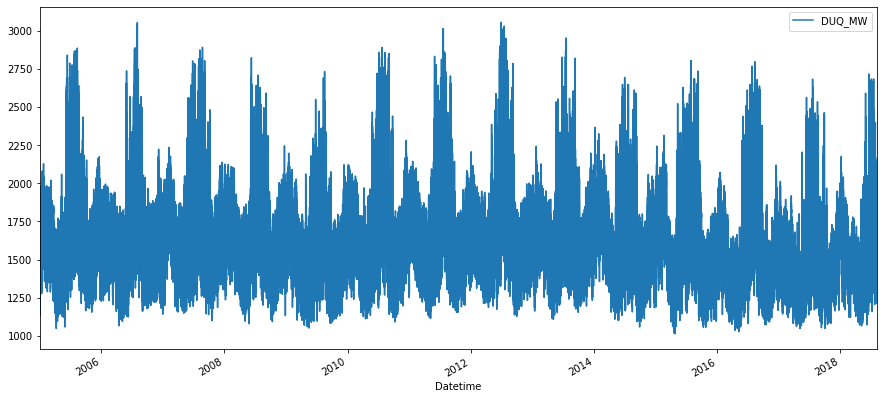

In [11]:
duq.plot()

In [13]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(duq['DUQ_MW'])[1])

 Критерий Дики-Фуллера: p=0.000000


### Преобразуем по дням

In [16]:
duq = pd.read_csv('DUQ_hourly.csv')
duq['Datetime']=pd.to_datetime(duq['Datetime'])
duq

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0
5,2005-12-31 06:00:00,1372.0
6,2005-12-31 07:00:00,1402.0
7,2005-12-31 08:00:00,1425.0
8,2005-12-31 09:00:00,1502.0
9,2005-12-31 10:00:00,1556.0


In [19]:
duq['date_time'] = duq["Datetime"].apply( lambda duq : 
datetime.datetime(year=duq.year, month=duq.month, day=duq.day))
duq.set_index(duq["date_time"],inplace=True)
duq

,Datetime,DUQ_MW,date_minus_time,date_time
date_time,,,,
2005-12-31,2005-12-31 01:00:00,1458.0,2005-12-31,2005-12-31
2005-12-31,2005-12-31 02:00:00,1377.0,2005-12-31,2005-12-31
2005-12-31,2005-12-31 03:00:00,1351.0,2005-12-31,2005-12-31
2005-12-31,2005-12-31 04:00:00,1336.0,2005-12-31,2005-12-31
2005-12-31,2005-12-31 05:00:00,1356.0,2005-12-31,2005-12-31
2005-12-31,2005-12-31 06:00:00,1372.0,2005-12-31,2005-12-31
2005-12-31,2005-12-31 07:00:00,1402.0,2005-12-31,2005-12-31
2005-12-31,2005-12-31 08:00:00,1425.0,2005-12-31,2005-12-31
2005-12-31,2005-12-31 09:00:00,1502.0,2005-12-31,2005-12-31


In [20]:
duq = duq.resample('D', on = 'date_time').sum()
duq

,DUQ_MW
date_time,
2005-01-01,31111.0
2005-01-02,32958.0
2005-01-03,37991.0
2005-01-04,38658.0
2005-01-05,41064.0
2005-01-06,40175.0
2005-01-07,40941.0
2005-01-08,38050.0
2005-01-09,36173.0


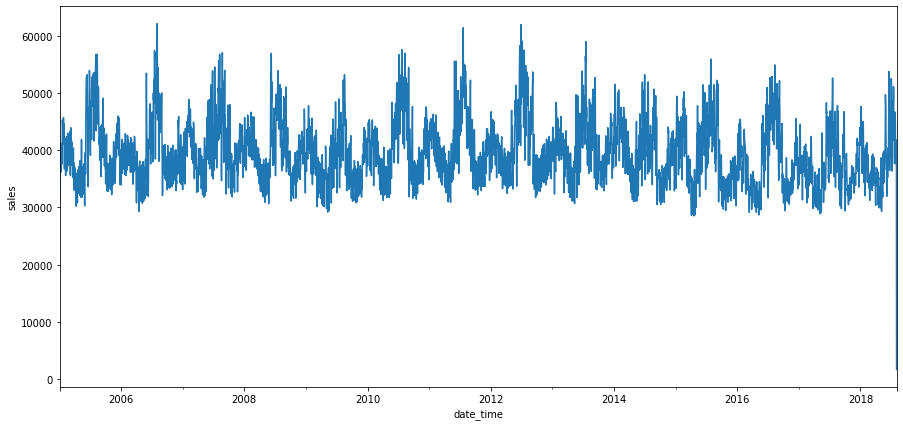

In [21]:
plt.figure(figsize(15,7))
duq['DUQ_MW'].plot()
plt.ylabel('sales')
pylab.show()

In [22]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(duq['DUQ_MW'])[1])

 Критерий Дики-Фуллера: p=0.000000


### По неделям

In [24]:
duq = pd.read_csv('DUQ_hourly.csv')
duq['Datetime']=pd.to_datetime(duq['Datetime'])
duq

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0
5,2005-12-31 06:00:00,1372.0
6,2005-12-31 07:00:00,1402.0
7,2005-12-31 08:00:00,1425.0
8,2005-12-31 09:00:00,1502.0
9,2005-12-31 10:00:00,1556.0


In [25]:
duq['date_time'] = duq["Datetime"].apply( lambda duq : 
datetime.datetime(year=duq.year, month=duq.month, day=duq.day))
duq.set_index(duq["date_time"],inplace=True)
duq

,Datetime,DUQ_MW,date_time
date_time,,,
2005-12-31,2005-12-31 01:00:00,1458.0,2005-12-31
2005-12-31,2005-12-31 02:00:00,1377.0,2005-12-31
2005-12-31,2005-12-31 03:00:00,1351.0,2005-12-31
2005-12-31,2005-12-31 04:00:00,1336.0,2005-12-31
2005-12-31,2005-12-31 05:00:00,1356.0,2005-12-31
2005-12-31,2005-12-31 06:00:00,1372.0,2005-12-31
2005-12-31,2005-12-31 07:00:00,1402.0,2005-12-31
2005-12-31,2005-12-31 08:00:00,1425.0,2005-12-31
2005-12-31,2005-12-31 09:00:00,1502.0,2005-12-31


In [26]:
duq = duq.resample('W', on = 'date_time').sum()
duq

,DUQ_MW
date_time,
2005-01-02,64069.0
2005-01-09,273052.0
2005-01-16,274529.0
2005-01-23,301980.0
2005-01-30,297042.0
2005-02-06,279108.0
2005-02-13,277123.0
2005-02-20,278826.0
2005-02-27,278574.0


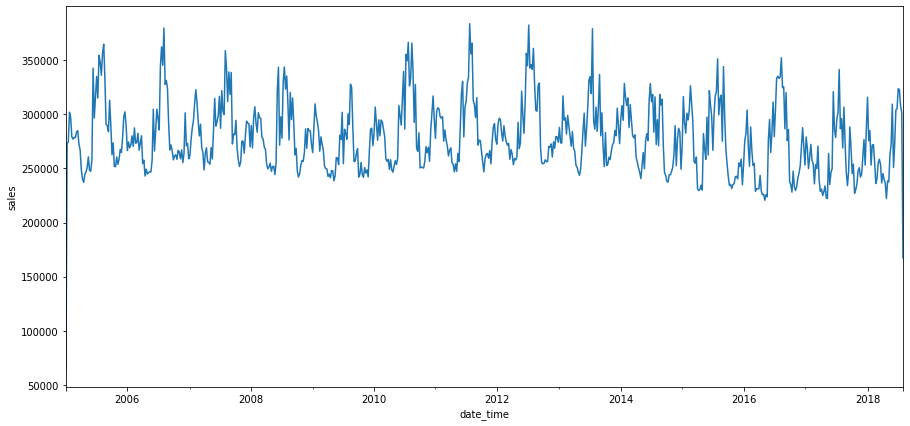

In [27]:
plt.figure(figsize(15,7))
duq['DUQ_MW'].plot()
plt.ylabel('sales')
pylab.show()

In [28]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(duq['DUQ_MW'])[1])

 Критерий Дики-Фуллера: p=0.000000


### По месяцам

In [29]:
duq = pd.read_csv('DUQ_hourly.csv')
duq['Datetime']=pd.to_datetime(duq['Datetime'])
duq

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0
5,2005-12-31 06:00:00,1372.0
6,2005-12-31 07:00:00,1402.0
7,2005-12-31 08:00:00,1425.0
8,2005-12-31 09:00:00,1502.0
9,2005-12-31 10:00:00,1556.0


In [30]:
duq['date_time'] = duq["Datetime"].apply( lambda duq : 
datetime.datetime(year=duq.year, month=duq.month, day=duq.day))
duq.set_index(duq["date_time"],inplace=True)
duq

,Datetime,DUQ_MW,date_time
date_time,,,
2005-12-31,2005-12-31 01:00:00,1458.0,2005-12-31
2005-12-31,2005-12-31 02:00:00,1377.0,2005-12-31
2005-12-31,2005-12-31 03:00:00,1351.0,2005-12-31
2005-12-31,2005-12-31 04:00:00,1336.0,2005-12-31
2005-12-31,2005-12-31 05:00:00,1356.0,2005-12-31
2005-12-31,2005-12-31 06:00:00,1372.0,2005-12-31
2005-12-31,2005-12-31 07:00:00,1402.0,2005-12-31
2005-12-31,2005-12-31 08:00:00,1425.0,2005-12-31
2005-12-31,2005-12-31 09:00:00,1502.0,2005-12-31


In [31]:
duq = duq.resample('M', on = 'date_time').sum()
duq

,DUQ_MW
date_time,
2005-01-31,1252603.0
2005-02-28,1113277.0
2005-03-31,1215163.0
2005-04-30,1037920.0
2005-05-31,1106793.0
2005-06-30,1355059.0
2005-07-31,1480779.0
2005-08-31,1472851.0
2005-09-30,1243349.0


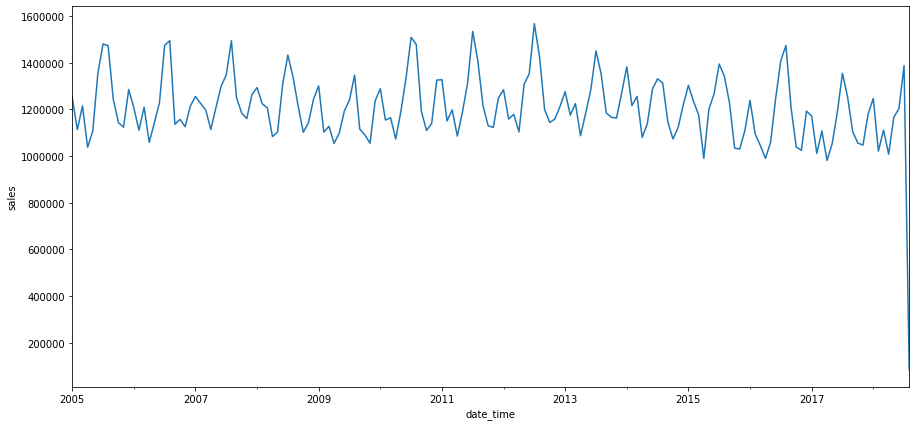

In [32]:
plt.figure(figsize(15,7))
duq['DUQ_MW'].plot()
plt.ylabel('sales')
pylab.show()

In [33]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(duq['DUQ_MW'])[1])

 Критерий Дики-Фуллера: p=0.989844


### Преобразуем по годам

In [34]:
duq = pd.read_csv('DUQ_hourly.csv')
duq['Datetime']=pd.to_datetime(duq['Datetime'])
duq

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0
5,2005-12-31 06:00:00,1372.0
6,2005-12-31 07:00:00,1402.0
7,2005-12-31 08:00:00,1425.0
8,2005-12-31 09:00:00,1502.0
9,2005-12-31 10:00:00,1556.0


In [38]:
duq['date_time'] = duq["Datetime"].apply( lambda duq : 
datetime.datetime(year=duq.year, month=duq.month, day=duq.day))
duq.set_index(duq["date_time"],inplace=True)
duq

,Datetime,DUQ_MW,date_time
date_time,,,
2005-12-31,2005-12-31 01:00:00,1458.0,2005-12-31
2005-12-31,2005-12-31 02:00:00,1377.0,2005-12-31
2005-12-31,2005-12-31 03:00:00,1351.0,2005-12-31
2005-12-31,2005-12-31 04:00:00,1336.0,2005-12-31
2005-12-31,2005-12-31 05:00:00,1356.0,2005-12-31
2005-12-31,2005-12-31 06:00:00,1372.0,2005-12-31
2005-12-31,2005-12-31 07:00:00,1402.0,2005-12-31
2005-12-31,2005-12-31 08:00:00,1425.0,2005-12-31
2005-12-31,2005-12-31 09:00:00,1502.0,2005-12-31


In [40]:
duq = duq.resample('Y', on = 'date_time').sum()
duq

,DUQ_MW
date_time,
2005-12-31,14830490.0
2006-12-31,14562752.0
2007-12-31,15003675.0
2008-12-31,14699758.0
2009-12-31,13964771.0
2010-12-31,14959342.0
2011-12-31,14925032.0
2012-12-31,15097835.0
2013-12-31,14822887.0


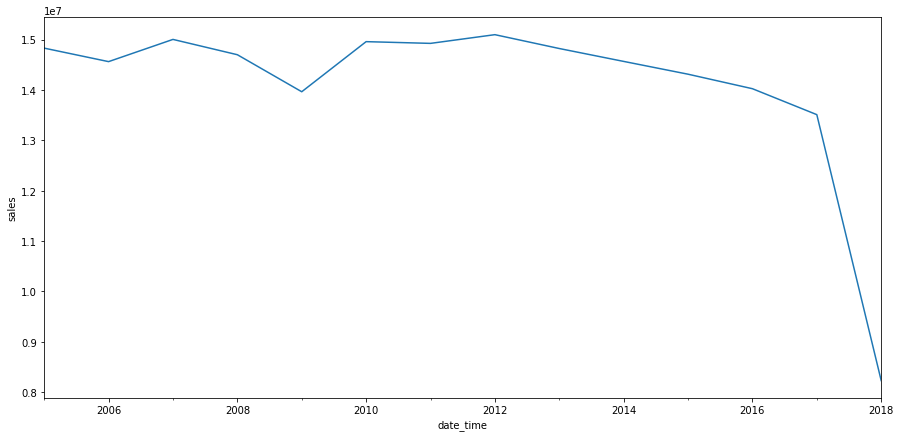

In [41]:
plt.figure(figsize(15,7))
duq['DUQ_MW'].plot()
plt.ylabel('sales')
pylab.show()

In [42]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(duq['DUQ_MW'])[1])

 Критерий Дики-Фуллера: p=0.998716


По критерию Дики-фуллера можно сделать вывод, что графики относительно часов, дней и недель больше походят на стационарные, критерий дики-фуллера также отвергает гипотезу о нестационарности.